In [1]:
import subprocess,os,mmap,sys
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import numpy as np
from pathlib import Path
import pandas as pd

from ase.io import read
from ase.visualize import view
from ase.build import surface
import ase.calculators.castep
import ase.io.castep

from pymatgen.core.structure import Structure
from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.electronic_structure.bandstructure import BandStructureSymmLine
from pymatgen.symmetry.kpath import KPathSetyawanCurtarolo,KPathLatimerMunro
from pymatgen.electronic_structure.dos import *
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

from scipy.stats import norm
from scipy.ndimage import gaussian_filter1d
from scipy.ndimage import convolve1d

sys.path.append("C:/Users/fcm19/Desktop/PhD/Project/modules_codes/script_share")
# from python.bs_plotter_felix_mod.src import *
from python_functions import *
from castep_output_class import *
from optados_output_class import *
from optados_plotting_functions import *



In [2]:
def extract_totals(files:list,labels:list):
    if len(labels) != len(files):
        raise IndexError('The number of given files and labels does not match!')
    totals = {}
    for idx,file in enumerate(files):
        local_total = []        
        for energy in file.qe_data.keys():
            local_total.append([float(energy),file.qe_data[energy]['total']])
        totals[labels[idx]] = np.array(local_total)
    return totals;

def extract_mte(files:list, labels:list):
    if len(labels) != len(files):
        raise IndexError('The number of given files and labels does not match!')
    totals = {}
    for idx,file in enumerate(files):
        local_total = []        
        for energy in file.qe_data.keys():
            local_total.append([float(energy),file.qe_data[energy]['mte']])
        totals[labels[idx]] = np.array(local_total)
    return totals;

def extract_wkfs(files:list, labels:list):
    if len(labels) != len(files):
        raise IndexError('The number of given files and labels does not match!')
    totals = {}
    for idx,file in enumerate(files):
        totals[labels[idx]] = file.od_parameters['photo_work_function']
    return totals;

# Contributors

## Comparison CuMgO Contributors

In [ ]:
experimental_mgo = np.genfromtxt('./structures/extra_data/Cu100_MgO_MTE.csv', delimiter=',', skip_header=1)
experimental_cu = np.genfromtxt('./structures/extra_data/Cu100_MTE.csv', delimiter=',', skip_header=1)
data_contribs = []
directories = {
    'Ag100_10':'./structures/AgMgO_interface/felix_new/Ag100_10/od_outputs/',
    'AgMgO1':'./structures/AgMgO_interface/felix_new/AgMgO1/od_outputs/',
    'AgMgO2':'./structures/AgMgO_interface/felix_new/AgMgO2/od_outputs/',
    'AgMgO3':'./structures/AgMgO_interface/felix_new/AgMgO3/od_outputs/',
    # 'AgMgO4':'./structures/AgMgO_interface/felix_new/AgMgO4/od_outputs/',
    # 'AgMgO5':'./structures/AgMgO_interface/felix_new/AgMgO5/od_outputs/',
    'AgMgO6':'./structures/AgMgO_interface/felix_new/AgMgO6/od_outputs/',
    'AgMgO7':'./structures/AgMgO_interface/felix_new/AgMgO7/od_outputs/',
    # 'AgMgO8':'./structures/AgMgO_interface/felix_new/AgMgO8/od_out/',
    }
# directories = {
#     'fem':'./OD_debug_files/Graphene/fem/',
#     'ome_new':'./OD_debug_files/Graphene/ome_new/',
#     }

for key in directories.keys():
    listOfFiles = os.listdir(path = directories[key])
    for item in listOfFiles:
        if '.odo' in item:
            temp_object = OptaDOSOutput(directories[key]+item)
            data_contribs.append([key,temp_object.photo_model,temp_object.photo_photon_energy,temp_object.qe,temp_object.mte*1000,temp_object.photo_work_function,temp_object.photo_photon_energy - temp_object.photo_work_function])
data_contribs = pd.DataFrame(data_contribs, columns=['System', 'Photo Model','Photon Energy [eV]','QE','MTE [meV]','Work Function [eV]', 'Excess Energy [eV]'])


In [ ]:
experimental_mgo

In [ ]:
system = 'AgMgO6'
df_system = data_contribs.loc[(data_contribs['System'] == system) & (data_contribs['MTE [meV]'] > 0.0)]
fig,ax = plt.subplots(1,1,figsize = [12,6], dpi = 200)
#ax.set_yscale('log')
# ax.grid(c=sns.color_palette(n_colors=1)[0],alpha=.8)
# ax2.grid(c=sns.color_palette(n_colors=2)[1],alpha=.8)
sns.lineplot(x=df_system['Excess Energy [eV]'],y=df_system['MTE [meV]'],color=sns.color_palette(n_colors=1)[0],ax=ax,estimator=np.mean)#,hue=df_system['Photo Model'],palette='bright')
ax.errorbar(experimental_mgo[:,1],experimental_mgo[:,2],fmt='+',yerr=experimental_mgo[:,2]*0.1,c=sns.color_palette(n_colors=2)[1],)
ax.legend(loc='upper left',labels=[r'$\overline{MTE}$',r'$min<->max$','CuMgO exp.'])
ax.set_xlim([0,2.5])
ax.set_ylim([0,1300])
ax.set_title(f"{system} + CuMgO experimental")
plt.tight_layout()
plt.savefig(f'./structures/AgMgO_interface/felix_new/{system}/Comparison_experiment_{system}.png',dpi=200)

### PDOS comparisons CuMgO system

In [ ]:
def read_out_cell_file(filename:str):
    lines = []
    if Path(filename).exists():
        with open(filename,'r') as f:
            lines = f.readlines()
        for idx, line in enumerate(lines):
        # get the cell size
            
        # get the fractional coordinates
        # create an ASE structure
    else:
        exit 0

In [4]:
data_angular_adaptive_mgo = np.genfromtxt('./structures/MgO_on_Cu/Interface/MgO3/pdos_data_03_24/MgO3.pdos.angular.adaptive.dat',delimiter=15,comments='#')
# data_angular_linear_mgo = np.genfromtxt('./structures/MgO_on_Cu/Interface/MgO3/pdos_data_03_24/MgO3.pdos.angular.linear.dat',delimiter=15,comments='#')

In [5]:
data_angular_adaptive_cu = np.genfromtxt('./structures/MgO_on_Cu/8L_Cu/Cu100.pdos.angular.linear.dat',delimiter=15,comments='#')
# data_linear_cu = np.genfromtxt('./structures/MgO_on_Cu/1x1_Cu100/Cu100_5_23.pdos.angular.linear.dat',delimiter=15,comments='#')


### PDOS Angular AgMgO system

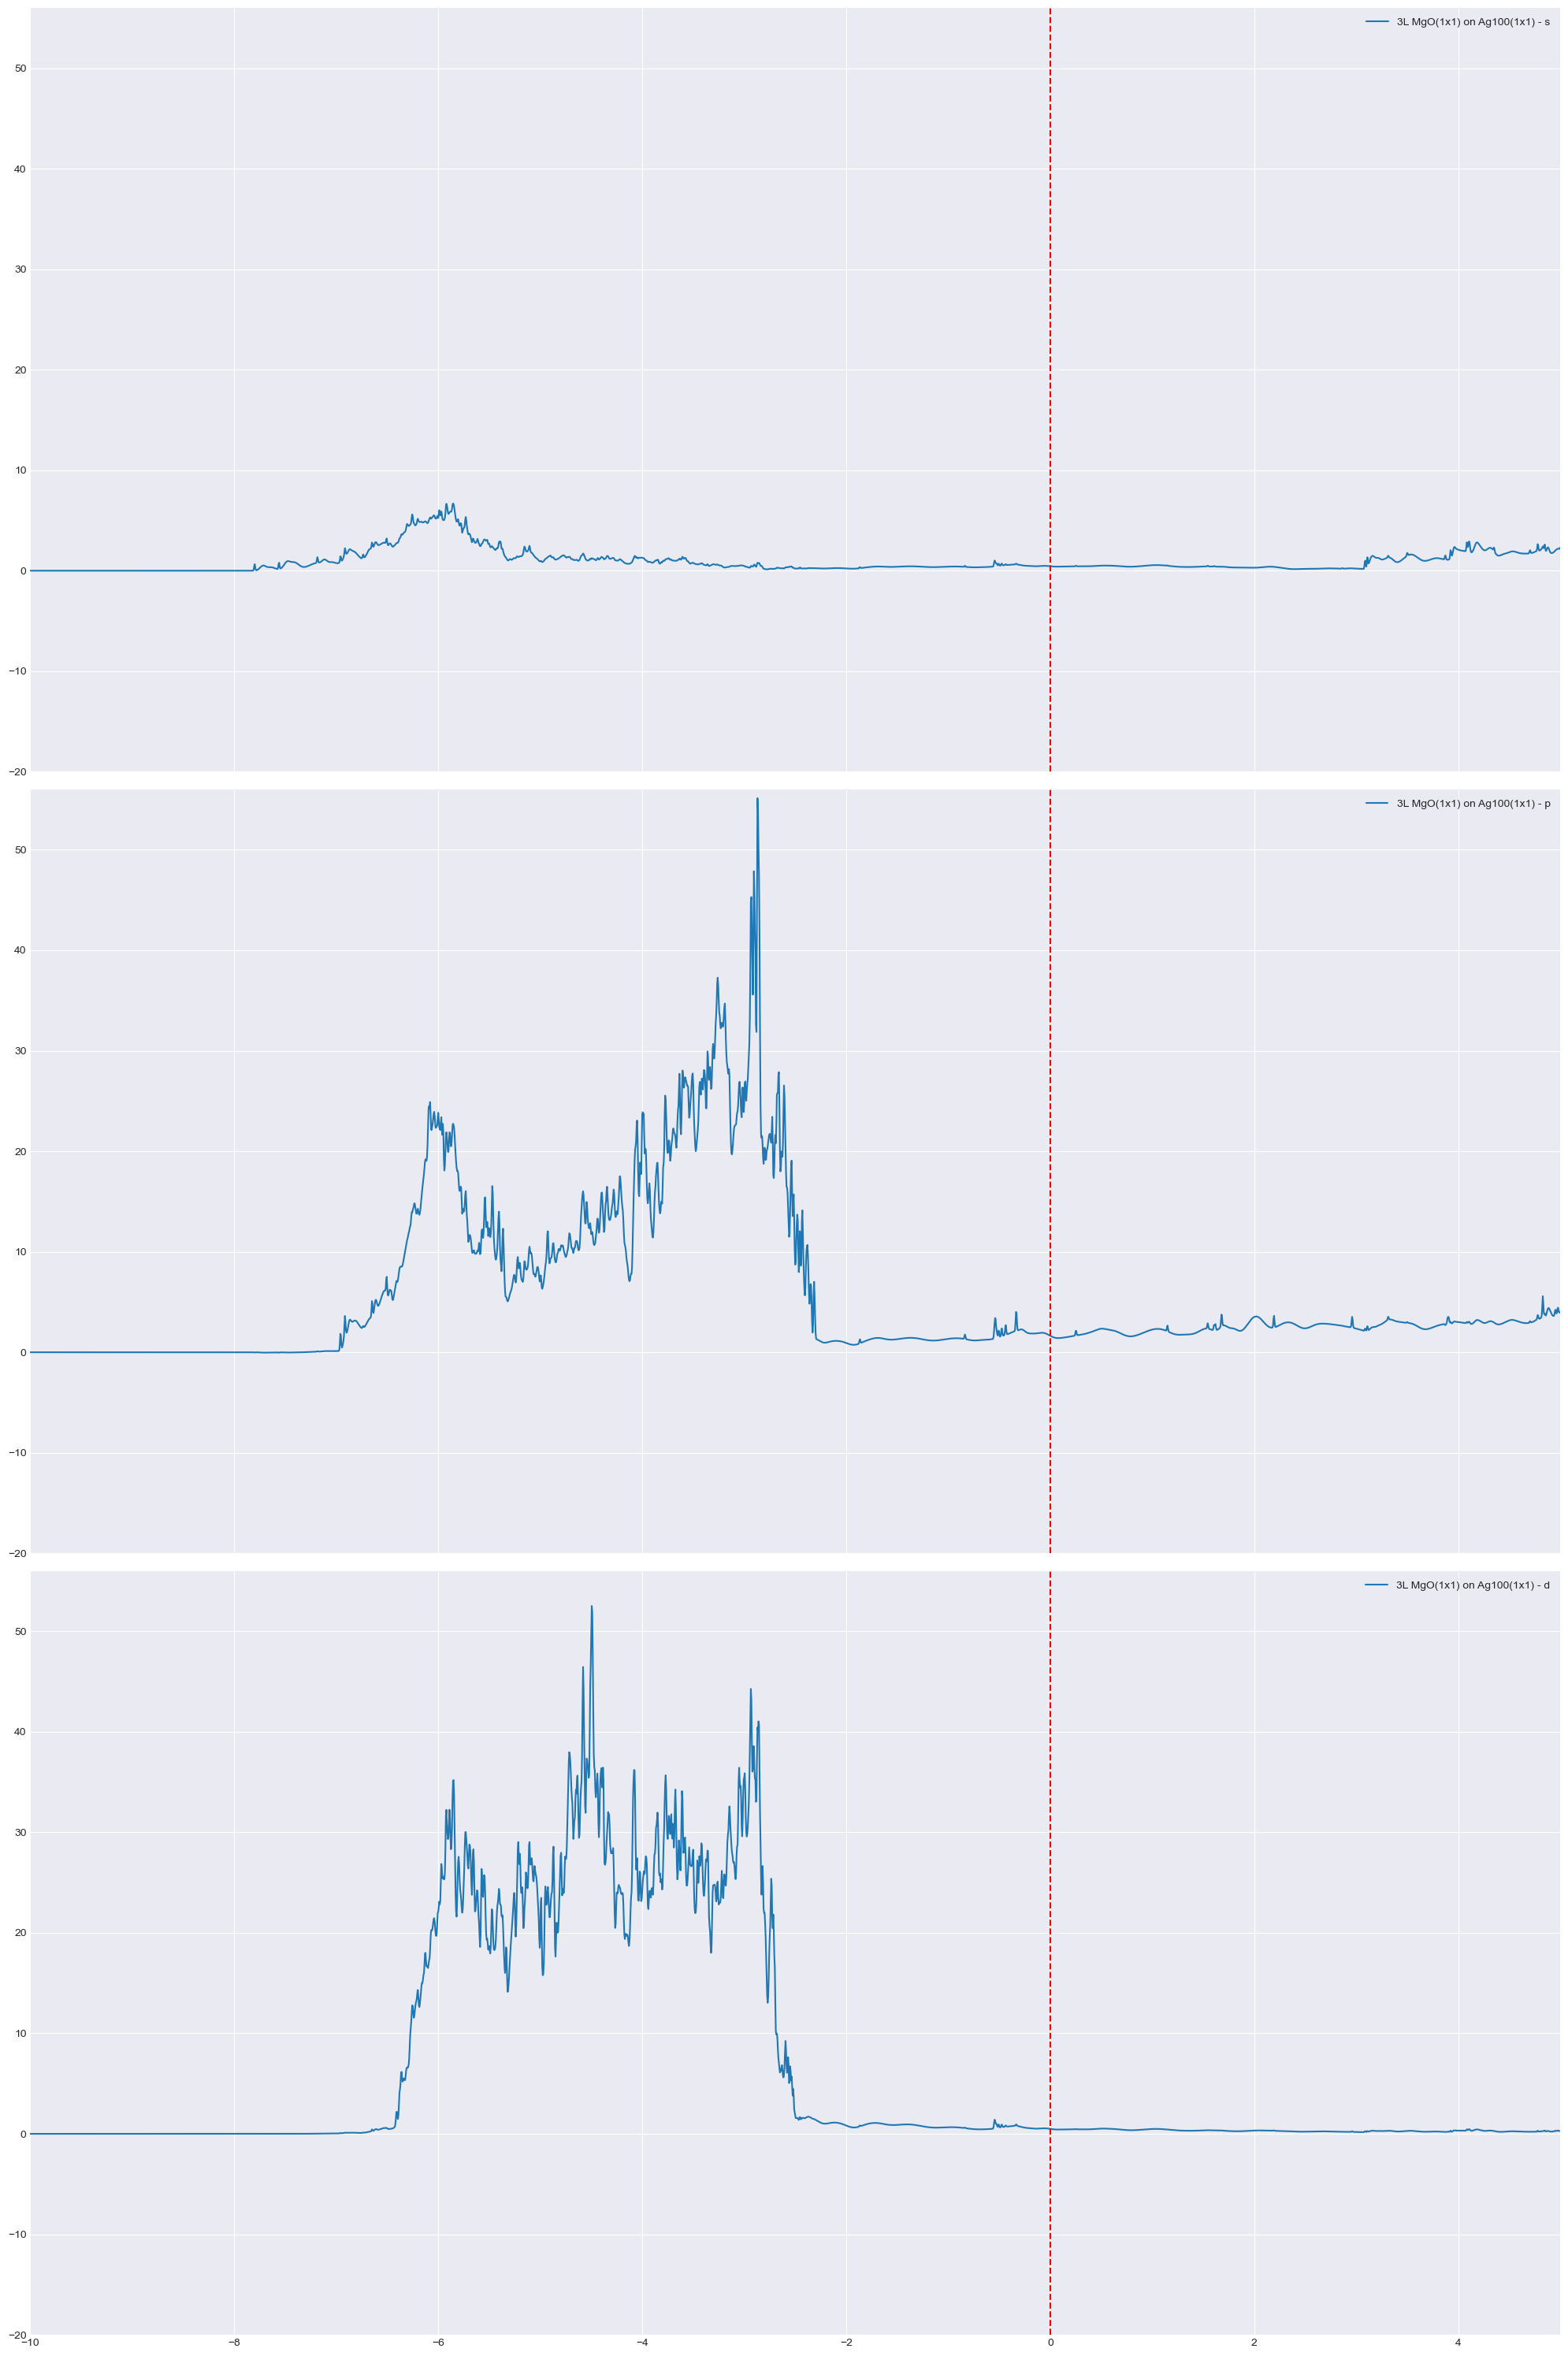

In [12]:
data_angular_adaptive_agmgo = np.genfromtxt('./structures/AgMgO_interface/felix_new/AgMgO6/pdos/AgMgO6.pdos.angular.adaptive.dat')
x = data_angular_adaptive_agmgo[:,0]
fig,ax = plt.subplots(3,1,figsize=[20,30],sharex=True)
# ax.plot(data_adaptive[:,0],data_adaptive[:,1])
ax[0].plot(x,data_angular_adaptive_agmgo[:,1],label='3L MgO(1x1) on Ag100(1x1) - s')
# ax[0].plot(data_angular_adaptive_cu[:,0],data_angular_adaptive_cu[:,1],label='Cu100(1x1) - s')
ax[1].plot(x,data_angular_adaptive_agmgo[:,2],label='3L MgO(1x1) on Ag100(1x1) - p')
# ax[1].plot(data_angular_adaptive_cu[:,0],data_angular_adaptive_cu[:,2],label='Cu100(1x1) - p')
ax[2].plot(x,data_angular_adaptive_agmgo[:,3],label='3L MgO(1x1) on Ag100(1x1) - d')
# ax[2].plot(data_angular_adaptive_cu[:,0],data_angular_adaptive_cu[:,3],label='Cu100(1x1) - d')
ax[0].set_xlim([-10,5])
ax[0].set_ylim([-20,56])
ax[1].set_ylim([-20,56])
ax[2].set_ylim([-20,56])
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[0].vlines([0],color='r',linestyle='--',ymin=ax[0].get_ylim()[0],ymax=ax[0].get_ylim()[1])
ax[1].vlines([0],color='r',linestyle='--',ymin=ax[1].get_ylim()[0],ymax=ax[1].get_ylim()[1])
ax[2].vlines([0],color='r',linestyle='--',ymin=ax[2].get_ylim()[0],ymax=ax[2].get_ylim()[1])
# ax.plot(data[:,0],data[:,3])
plt.tight_layout()
plt.savefig('./structures/AgMgO_interface/felix_new/AgMgO6/PDOS_angular_adaptive_zoom_-10_5.png',dpi=250)

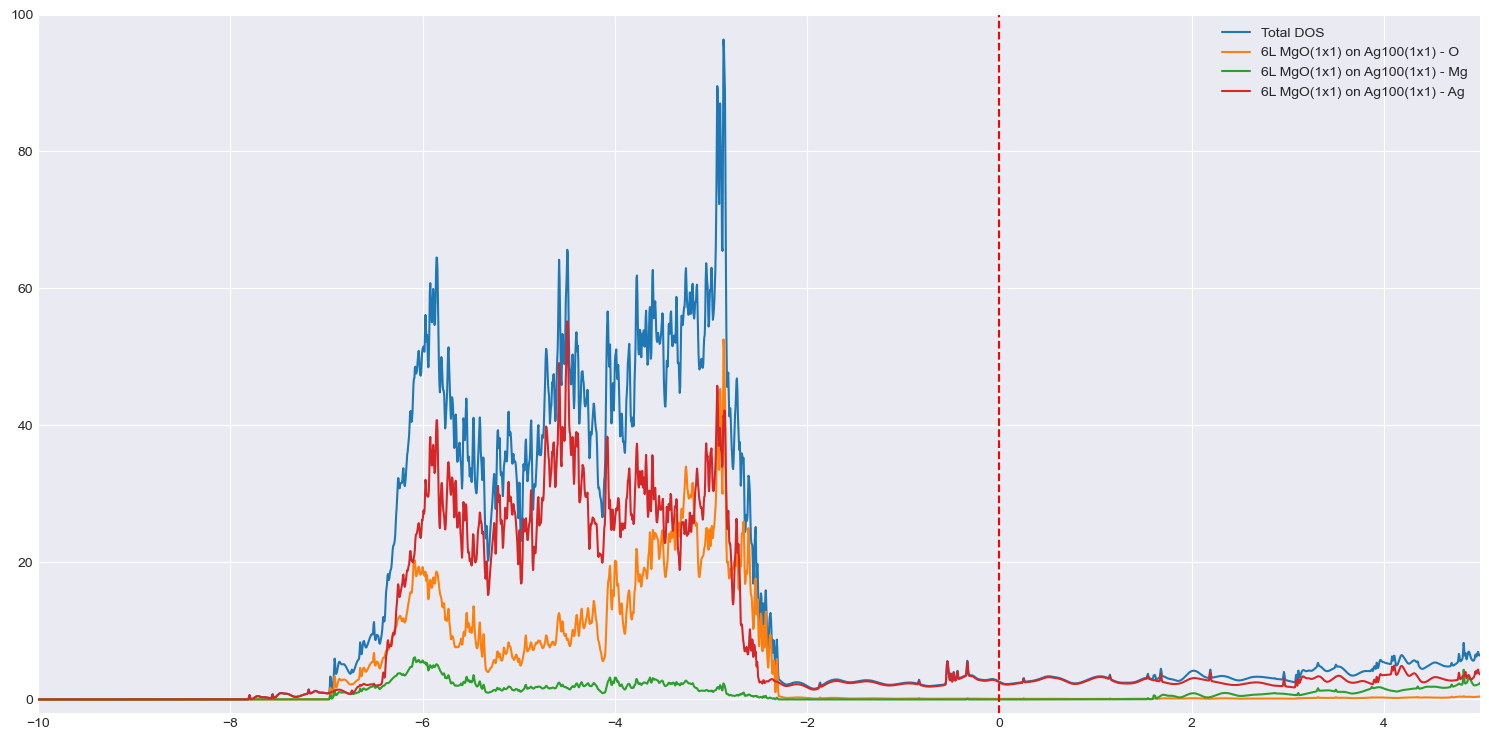

In [11]:
data_species_adaptive_agmgo = np.genfromtxt('./structures/AgMgO_interface/felix_new/AgMgO6/pdos/AgMgO6.pdos.species.adaptive.dat')
x = data_species_adaptive_agmgo[:,0]
sum_agmgo = data_species_adaptive_agmgo[:,1:].sum(-1)
fig,ax = plt.subplots(1,1,figsize=[15,7.5])
# axot(data_adaptive[:,0],data_adaptive[:,1])
ax.plot(x,sum_agmgo, label = 'Total DOS')
ax.plot(x,data_species_adaptive_agmgo[:,1],label='6L MgO(1x1) on Ag100(1x1) - O')
# ax.plot(data_angular_adaptive_cu[:,0],data_angular_adaptive_cu[:,1],label='Cu100(1x1) - s')
ax.plot(x,data_species_adaptive_agmgo[:,2],label='6L MgO(1x1) on Ag100(1x1) - Mg')
# ax.plot(data_angular_adaptive_cu[:,0],data_angular_adaptive_cu[:,2],label='Cu100(1x1) - p')
ax.plot(x,data_species_adaptive_agmgo[:,3],label='6L MgO(1x1) on Ag100(1x1) - Ag')

# ax.plot(data_angular_adaptive_cu[:,0],data_angular_adaptive_cu[:,3],label='Cu100(1x1) - d')
ax.set_xlim([-10,5])
ax.set_ylim([-2,100])
ax.legend()
ax.vlines([0],color='r',linestyle='--',ymin=ax.get_ylim()[0],ymax=ax.get_ylim()[1])
# ax.plot(data[:,0],data[:,3])
plt.tight_layout()
plt.savefig('./structures/AgMgO_interface/felix_new/AgMgO6/PDOS_species_adaptive_zoom_-10_5.png',dpi=250)

### Comparison MgO Interface, Cu slab

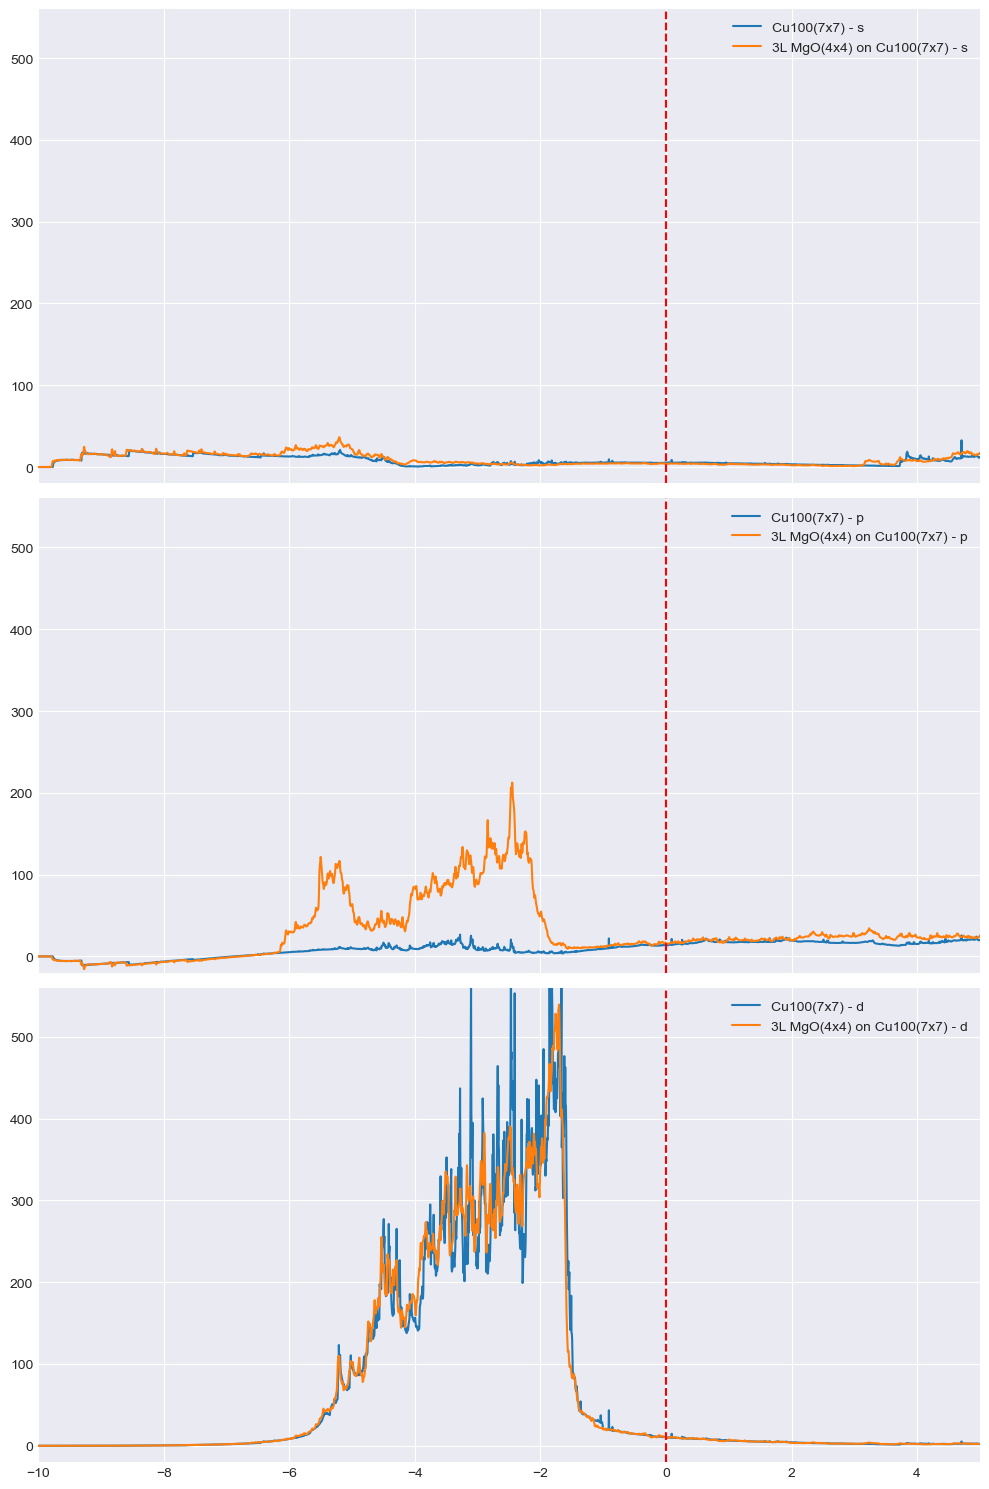

In [10]:
offset = 0.75
fig,ax = plt.subplots(3,1,figsize=[10,15],sharex=True)

ax[0].plot(data_angular_adaptive_cu[:,0],data_angular_adaptive_cu[:,1],label='Cu100(7x7) - s')
ax[1].plot(data_angular_adaptive_cu[:,0],data_angular_adaptive_cu[:,2],label='Cu100(7x7) - p')
ax[2].plot(data_angular_adaptive_cu[:,0],data_angular_adaptive_cu[:,3],label='Cu100(7x7) - d')

ax[0].plot(data_angular_adaptive_mgo[:,0],data_angular_adaptive_mgo[:,1],label='3L MgO(4x4) on Cu100(7x7) - s')
ax[1].plot(data_angular_adaptive_mgo[:,0],data_angular_adaptive_mgo[:,2],label='3L MgO(4x4) on Cu100(7x7) - p')
ax[2].plot(data_angular_adaptive_mgo[:,0],data_angular_adaptive_mgo[:,3],label='3L MgO(4x4) on Cu100(7x7) - d')


# ax[2].plot(data_angular_adaptive_cu[:,0]+offset,data_angular_adaptive_cu[:,3],linestyle = ':',label=f'Cu100(7x7) - d - shifted({offset} eV)')

ax[0].set_xlim([-10,5])
ax[0].set_ylim([-20,560])
ax[1].set_ylim([-20,560])
ax[2].set_ylim([-20,560])
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[0].vlines([0],color='r',linestyle='--',ymin=ax[0].get_ylim()[0],ymax=ax[0].get_ylim()[1])
ax[1].vlines([0],color='r',linestyle='--',ymin=ax[1].get_ylim()[0],ymax=ax[1].get_ylim()[1])
ax[2].vlines([0],color='r',linestyle='--',ymin=ax[2].get_ylim()[0],ymax=ax[2].get_ylim()[1])
# ax.plot(data[:,0],data[:,3])
plt.tight_layout()
plt.savefig('./structures/MgO_on_Cu/Interface/MgO3/pdos_data_03_24/PDOS_comparison_angular_adaptive_zoom_-10_5.png',dpi=250)

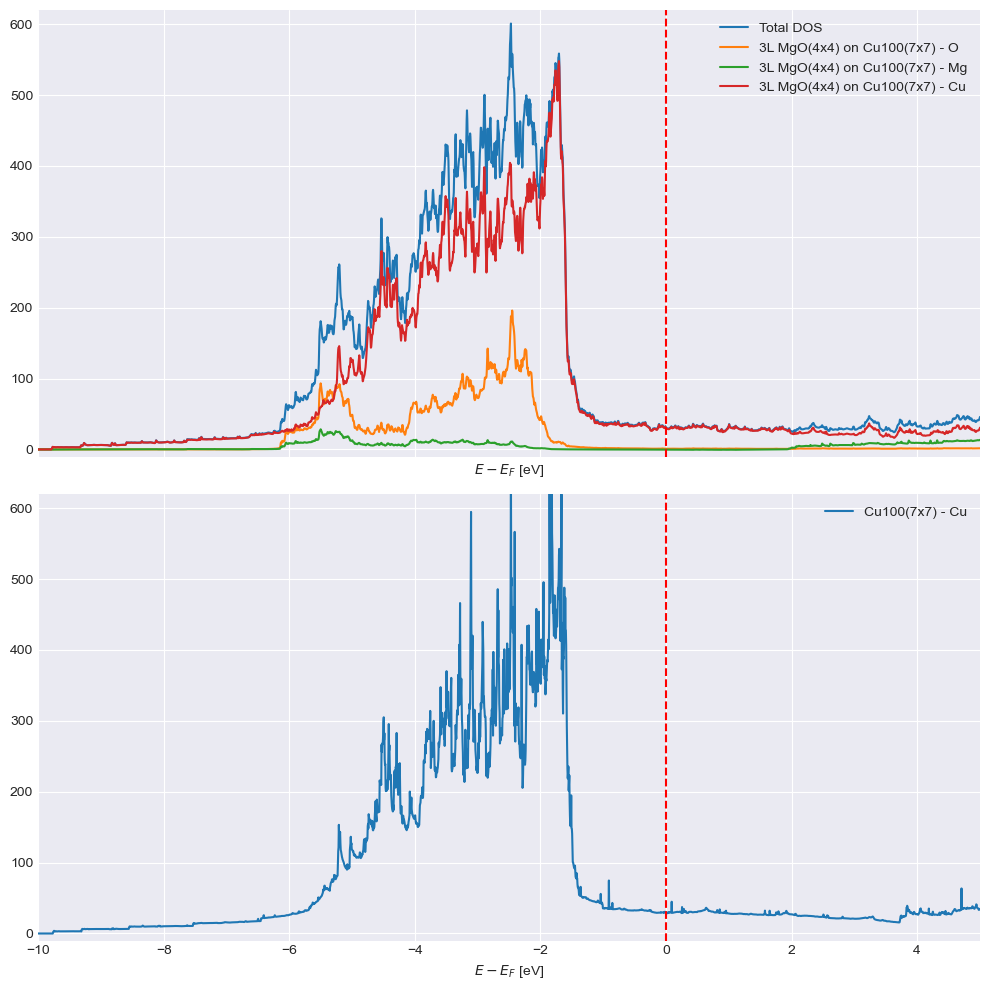

In [18]:
plt.style.use('seaborn-v0_8-darkgrid')
data_species_adaptive_mgo = np.genfromtxt('./structures/MgO_on_Cu/Interface/MgO3/pdos_data_03_24/MgO3.pdos.species.adaptive.dat',delimiter=15,comments='#')
x_mgo = data_species_adaptive_mgo[:,0]
data_species_adaptive_cu = np.genfromtxt('./structures/MgO_on_Cu/8L_Cu/Cu100.pdos.species.adaptive.dat',delimiter=15,comments='#')
x_cu = data_species_adaptive_cu[:,0]
# data_angular_linear_mgo = np.genfromtxt('./structures/MgO_on_Cu/Interface/MgO3/pdos_data_03_24/MgO3.pdos.angular.linear.dat',delimiter=15,comments='#')
# data_angular_adaptive_cu = np.genfromtxt('./structures/MgO_on_Cu/1x1_Cu100/Cu100_5_23.pdos.angular.dat',delimiter=15,comments='#')
# data_linear_cu = np.genfromtxt('./structures/MgO_on_Cu/1x1_Cu100/Cu100_5_23.pdos.angular.linear.dat',delimiter=15,comments='#')
sum_mgo = data_species_adaptive_mgo[:,1:].sum(-1)
sum_cu = data_species_adaptive_cu[:,1:].sum(-1)
fig,ax = plt.subplots(2,1,figsize=[10,10],sharex=True)
# ax[0].plot(data_adaptive[:,0],data_adaptive[:,1])
ax[0].plot(x_mgo,sum_mgo, label = 'Total DOS')
ax[0].plot(x_mgo,data_species_adaptive_mgo[:,1],label='3L MgO(4x4) on Cu100(7x7) - O')
ax[0].plot(x_mgo,data_species_adaptive_mgo[:,2],label='3L MgO(4x4) on Cu100(7x7) - Mg')
ax[0].plot(x_mgo,data_species_adaptive_mgo[:,3],label='3L MgO(4x4) on Cu100(7x7) - Cu')
ax[0].set_xlim([-10,5])
ax[0].set_ylim([-10,620])
ax[0].set_xlabel('$E - E_F$ [eV]')
ax[0].legend()

# ax[1].plot(x_cu,sum_cu, label = 'Total DOS')
ax[1].plot(x_cu,data_species_adaptive_cu[:,1],label='Cu100(7x7) - Cu')
ax[1].set_xlim([-10,5])
ax[1].set_ylim([-10,620])
ax[1].set_xlabel('$E - E_F$ [eV]')
ax[1].legend()

ax[0].vlines([0],color='r',linestyle='--',ymin=ax[0].get_ylim()[0],ymax=ax[0].get_ylim()[1])
ax[1].vlines([0],color='r',linestyle='--',ymin=ax[1].get_ylim()[0],ymax=ax[1].get_ylim()[1])
# ax[0].plot(data[:,0],data[:,3])
plt.tight_layout()
plt.savefig('./structures/MgO_on_Cu/Interface/MgO3/pdos_data_03_24/PDOS_comp_species_adaptive_zoom_-10_5.png',dpi=250)

### Comparison AgMgO/CuMgO

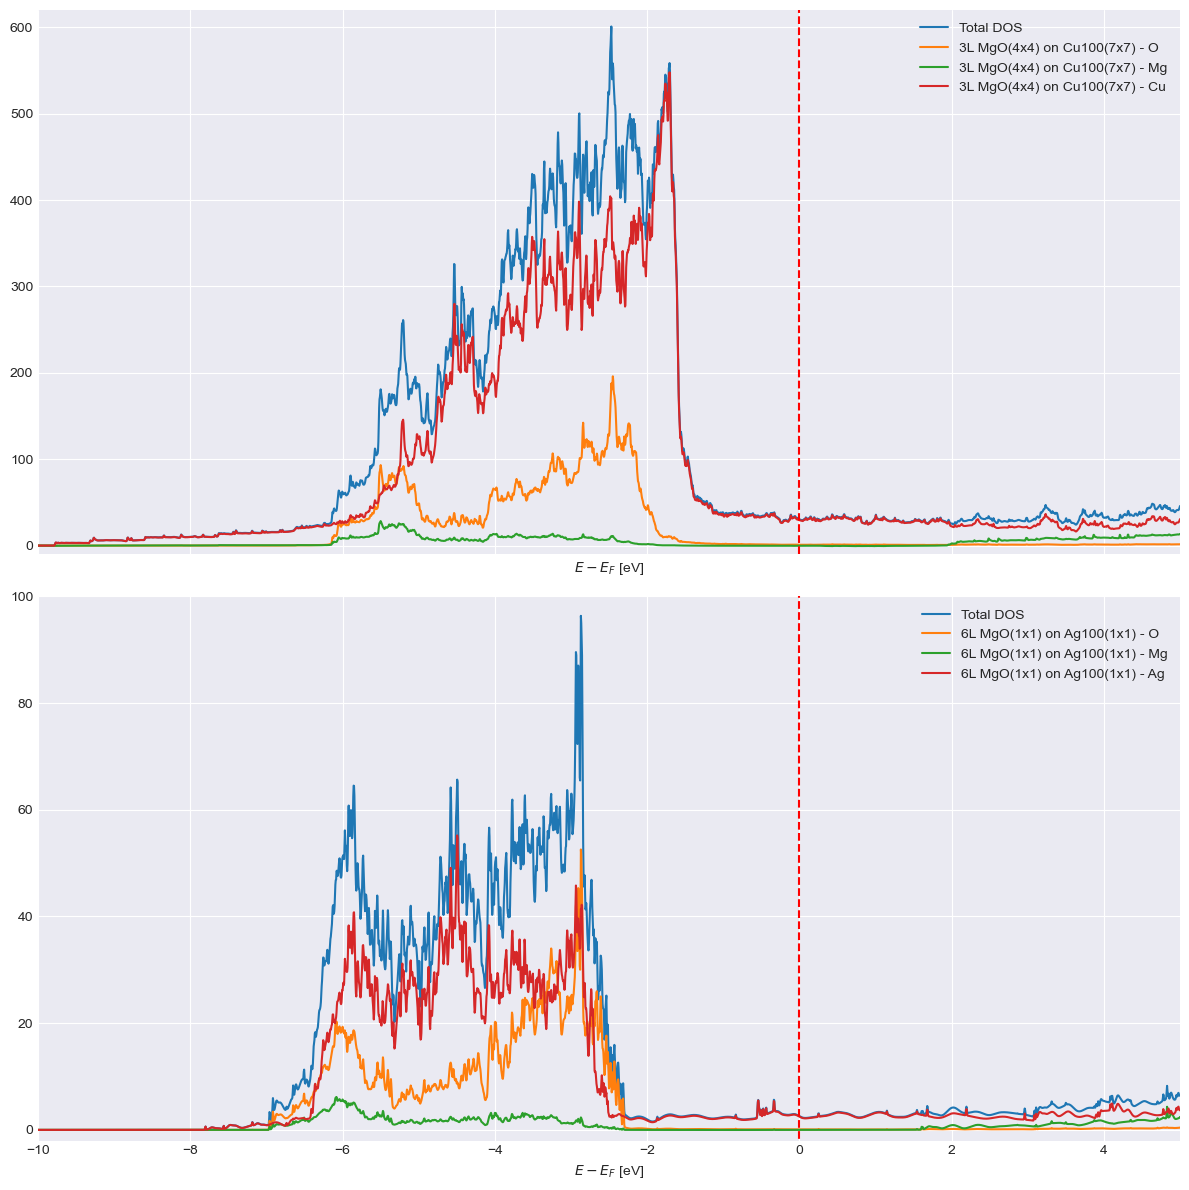

In [14]:
data_species_adaptive_agmgo = np.genfromtxt('./structures/AgMgO_interface/felix_new/AgMgO6/pdos/AgMgO6.pdos.species.adaptive.dat')
x = data_species_adaptive_agmgo[:,0]
sum_agmgo = data_species_adaptive_agmgo[:,1:].sum(-1)

data_species_adaptive_mgo = np.genfromtxt('./structures/MgO_on_Cu/Interface/MgO3/pdos_data_03_24/MgO3.pdos.species.adaptive.dat',delimiter=15,comments='#')
x_mgo = data_species_adaptive_mgo[:,0]

plt.style.use('seaborn-v0_8-darkgrid')

# data_angular_linear_mgo = np.genfromtxt('./structures/MgO_on_Cu/Interface/MgO3/pdos_data_03_24/MgO3.pdos.angular.linear.dat',delimiter=15,comments='#')
# data_angular_adaptive_cu = np.genfromtxt('./structures/MgO_on_Cu/1x1_Cu100/Cu100_5_23.pdos.angular.dat',delimiter=15,comments='#')
# data_linear_cu = np.genfromtxt('./structures/MgO_on_Cu/1x1_Cu100/Cu100_5_23.pdos.angular.linear.dat',delimiter=15,comments='#')
sum_mgo = data_species_adaptive_mgo[:,1:].sum(-1)
sum_cu = data_species_adaptive_cu[:,1:].sum(-1)
fig,ax = plt.subplots(2,1,figsize=[12,12],sharex=True)
# ax[0].plot(data_adaptive[:,0],data_adaptive[:,1])
ax[0].plot(x_mgo,sum_mgo, label = 'Total DOS')
ax[0].plot(x_mgo,data_species_adaptive_mgo[:,1],label='3L MgO(4x4) on Cu100(7x7) - O')
ax[0].plot(x_mgo,data_species_adaptive_mgo[:,2],label='3L MgO(4x4) on Cu100(7x7) - Mg')
ax[0].plot(x_mgo,data_species_adaptive_mgo[:,3],label='3L MgO(4x4) on Cu100(7x7) - Cu')
ax[0].set_xlim([-10,5])
ax[0].set_ylim([-10,620])
ax[0].set_xlabel('$E - E_F$ [eV]')
ax[0].vlines([0],color='r',linestyle='--',ymin=ax[0].get_ylim()[0],ymax=ax[0].get_ylim()[1])
ax[0].legend()

ax[1].plot(x,sum_agmgo, label = 'Total DOS')
ax[1].plot(x,data_species_adaptive_agmgo[:,1],label='6L MgO(1x1) on Ag100(1x1) - O')
ax[1].plot(x,data_species_adaptive_agmgo[:,2],label='6L MgO(1x1) on Ag100(1x1) - Mg')
ax[1].plot(x,data_species_adaptive_agmgo[:,3],label='6L MgO(1x1) on Ag100(1x1) - Ag')
ax[1].set_xlim([-10,5])
ax[1].set_ylim([-2,100])
ax[1].set_xlabel('$E - E_F$ [eV]')
ax[1].vlines([0],color='r',linestyle='--',ymin=ax[0].get_ylim()[0],ymax=ax[0].get_ylim()[1])
ax[1].legend()
plt.tight_layout()
# ax[0].plot(data[:,0],data[:,3])
plt.savefig('./structures/MgO_on_Cu/Interface/MgO3/pdos_data_03_24/PDOS_comp_systems_species_adaptive_zoom_-10_5.png',dpi=250)

## Cu Photocathodes

### Cu100

In [ ]:
data = {
    '100_300K': OptaDOSOutput(Path('./OD_debug_files/Cu100_10L_PCvsSC/1x1/atom_optics_01_24/Cu100_1x1_3step_sweep_4.2_9.2_jdos_0.05_max25_bands_removed.odo')),
    '110_300K':  OptaDOSOutput(Path('c:\\Users\\fcm19\\OneDrive - Imperial College London\\Desktop\\PhD\\Project\\photoemission\\structures\\Cu_photocathodes\\new_optados_02_24\\Cu110\\Cu110_5_23_300K.odo')),
    '111_300K':  OptaDOSOutput(Path('c:\\Users\\fcm19\\OneDrive - Imperial College London\\Desktop\\PhD\\Project\\photoemission\\structures\\Cu_photocathodes\\new_optados_02_24\\Cu111\\Cu111_5_23_300K.odo')),
    '100_77K': OptaDOSOutput(Path('c:\\Users\\fcm19\\OneDrive - Imperial College London\\Desktop\\PhD\\Project\\photoemission\\structures\\Cu_photocathodes\\new_optados_02_24\\Cu100\\Cu100_5_23_77K.odo')),
    '110_77K':  OptaDOSOutput(Path('c:\\Users\\fcm19\\OneDrive - Imperial College London\\Desktop\\PhD\\Project\\photoemission\\structures\\Cu_photocathodes\\new_optados_02_24\\Cu110\\Cu110_5_23_77K.odo')),
    '111_77K':  OptaDOSOutput(Path('c:\\Users\\fcm19\\OneDrive - Imperial College London\\Desktop\\PhD\\Project\\photoemission\\structures\\Cu_photocathodes\\new_optados_02_24\\Cu111\\Cu111_5_23_77K.odo')),
    '100_300K_old': OptaDOSOutput(Path('c:\\Users\\fcm19\\OneDrive - Imperial College London\\Desktop\\PhD\\Project\\photoemission\\structures\\Cu_photocathodes\\Cu100\\Cu100_5_23_1step_photon_sweep_4.2_to_9.2_77K.odo')),
    # '110_300K_old':  OptaDOSOutput(Path('c:\\Users\\fcm19\\OneDrive - Imperial College London\\Desktop\\PhD\\Project\\photoemission\\structures\\Cu_photocathodes\\new_optados_02_24\\Cu110\\Cu110_5_23.odo')),
    # '111_300K_old':  OptaDOSOutput(Path('c:\\Users\\fcm19\\OneDrive - Imperial College London\\Desktop\\PhD\\Project\\photoemission\\structures\\Cu_photocathodes\\new_optados_02_24\\Cu111\\Cu111_5_23.odo')),
}


In [ ]:
totals = extract_totals([data['100_300K'],data['110_300K'],data['111_300K'],data['100_77K'],data['110_77K'],data['111_77K']],['100_300K','110_300K','111_300K','100_77K','110_77K','111_77K'])
mtes = extract_mte([data['100_300K'],data['110_300K'],data['111_300K'],data['100_77K'],data['110_77K'],data['111_77K']],['100_300K','110_300K','111_300K','100_77K','110_77K','111_77K'])
wkft = extract_wkfs([data['100_300K'],data['110_300K'],data['111_300K'],data['100_77K'],data['110_77K'],data['111_77K']],['100_300K','110_300K','111_300K','100_77K','110_77K','111_77K'])

In [ ]:
data_100_wkfct_300K = {}
#4.05 : OptaDOSOutput(Path('./structures/Cu_photocathodes/new_optados_02_24/Cu100'))
folder = './structures/Cu_photocathodes/new_optados_02_24/Cu111/wkfct_sweep/300K/'
file_list = os.listdir(folder)
for item in file_list:
    path = folder+'/'+item
    if Path(path).suffix.lower() == '.odo':
        temp_w = float(item.split('_')[-2])
        data_100_wkfct_300K[temp_w] =  OptaDOSOutput(Path(path))
mtes_wkfct = {}
files,labels = [],[]
for key in data_100_wkfct_300K.keys():
    files.append(data_100_wkfct_300K[key])
    labels.append(str(key))
mtes_wkfct = extract_mte(files, labels)

In [ ]:
cmap = mpl.colormaps['viridis_r']
colors = cmap(np.linspace(0, 1, 11))
fig,ax = plt.subplots(1,1,figsize=[12,8])
ax.vlines(4.32,ymin=-5,ymax=600,linestyle='--',colors='tab:orange',label='original workfct')
keys = reversed(list(mtes_wkfct.keys()))
# keys = list(mtes_wkfct.keys())
mpl.style.use('seaborn-v0_8-talk')
for idx, label in enumerate(keys):
    if idx == 0 or idx == 10:
        ax.plot(mtes_wkfct[label][:,0], mtes_wkfct[label][:,1],c=colors[idx], label = f'work-fct = {label}')
    else:
        ax.plot(mtes_wkfct[label][:,0], mtes_wkfct[label][:,1],c=colors[idx])
ax.set(ylim=[-5,600])
plt.legend(fontsize='large')
plt.tight_layout()
plt.savefig('./structures/Cu_photocathodes/new_optados_02_24/Cu111/wkfct_sweep/Curves_comp_111_2.png',dpi=250)

In [ ]:
sim = {
    100 : {
        1 : OptaDOSOutput(Path('./structures/Cu_photocathodes/Cu100/Cu100_5_23_1step_photon_sweep_4.2_to_9.2.odo.crystal')),
        3 : OptaDOSOutput(Path('./structures/Cu_photocathodes/Cu100/Cu100_5_23_3step_photon_sweep_4.2_to_9.2.odo.crystal')),
        771 :  OptaDOSOutput(Path('./structures/Cu_photocathodes/Cu100/Cu100_5_23_1step_photon_sweep_4.2_to_9.2_77K.odo')),
        773 :  OptaDOSOutput(Path('./structures/Cu_photocathodes/Cu100/Cu100_5_23_1step_photon_sweep_4.2_to_9.2_77K.odo')),
    },
    110 : {
        1 : OptaDOSOutput(Path('./structures/Cu_photocathodes/Cu110/Cu110_5_23_1step_photon_sweep_4.2_to_9.2.odo.crystal')),
        3 : OptaDOSOutput(Path('./structures/Cu_photocathodes/Cu110/Cu110_5_23_3step_photon_sweep_4.2_to_9.2.odo.crystal')),
        771 :  OptaDOSOutput(Path('./structures/Cu_photocathodes/Cu110/Cu110_5_23_1step_photon_sweep_4.2_to_9.2_77K.odo')),
        773 :  OptaDOSOutput(Path('./structures/Cu_photocathodes/Cu110/Cu110_5_23_1step_photon_sweep_4.2_to_9.2_77K.odo')),
    },
    111 : {
        1 : OptaDOSOutput(Path('./structures/Cu_photocathodes/Cu111/Cu111_5_23_1step_photon_sweep_4.2_to_9.2.odo.crystal')),
        3 : OptaDOSOutput(Path('./structures/Cu_photocathodes/Cu111/Cu111_5_23_3step_photon_sweep_4.2_to_9.2.odo.crystal')),
        771 :  OptaDOSOutput(Path('./structures/Cu_photocathodes/Cu111/Cu111_5_23_1step_photon_sweep_4.2_to_9.2_77K.odo')),
        773 :  OptaDOSOutput(Path('./structures/Cu_photocathodes/Cu111/Cu111_5_23_1step_photon_sweep_4.2_to_9.2_77K.odo')),
        871 : OptaDOSOutput(Path('./structures/Cu_photocathodes/Cu111/workfct_4.57/Cu111_5_23_1step_photon_sweep_4.2_to_9.2_77K.odo')),
        873 : OptaDOSOutput(Path('./structures/Cu_photocathodes/Cu111/workfct_4.57/Cu111_5_23_3step_photon_sweep_4.2_to_9.2_77K.odo')),
        83 : OptaDOSOutput(Path('./structures/Cu_photocathodes/Cu111/workfct_4.57/Cu111_5_23_1step_photon_sweep_4.2_to_9.2_300K.odo')), 
        81 : OptaDOSOutput(Path('./structures/Cu_photocathodes/Cu111/workfct_4.57/Cu111_5_23_3step_photon_sweep_4.2_to_9.2_300K.odo')), 
    },
}
wkf = {
    100 : {
        1:sim[100][1].od_parameters['photo_work_function'],
        3:sim[100][1].od_parameters['photo_work_function'],
        771:sim[100][771].od_parameters['photo_work_function'],
        773:sim[100][773].od_parameters['photo_work_function'],
    },
    110 : {
        1:sim[110][1].od_parameters['photo_work_function'],
        3:sim[110][1].od_parameters['photo_work_function'],
        771:sim[110][771].od_parameters['photo_work_function'],
        773:sim[110][773].od_parameters['photo_work_function'],
    },
    111 : {
        1:sim[111][1].od_parameters['photo_work_function'],
        3:sim[111][1].od_parameters['photo_work_function'],
        771:sim[111][771].od_parameters['photo_work_function'],
        773:sim[111][773].od_parameters['photo_work_function'],
        871:sim[111][871].od_parameters['photo_work_function'],
        873:sim[111][873].od_parameters['photo_work_function'],
        81:sim[111][81].od_parameters['photo_work_function'],
        83:sim[111][83].od_parameters['photo_work_function'],
    },
}

temperature = {
    100 : {
        1:300,
        3:300,
        771:77,
        773:77,
    },
    110 : {
        1:300,
        3:300,
        771:77,
        773:77,
    },
    111 : {
        1:300,
        3:300,
        771:77,
        773:77,
        871:77,
        873:77,
        81:300,
        83:300,
    },
}

In [ ]:
exp=  {
    '100_300K' : np.genfromtxt(Path('./structures/Cu_photocathodes/exp_data/Cu100_exp_hugh_2_24_300K.dat'),delimiter=',',comments='#',dtype=float),
    '110_300K' : np.genfromtxt(Path('./structures/Cu_photocathodes/exp_data/Cu110_exp_hugh_2_24_300K.dat'),delimiter=',',comments='#',dtype=float),
    '111_300K' : np.genfromtxt(Path('./structures/Cu_photocathodes/exp_data/Cu111_exp_hugh_2_24_300K.dat'),delimiter=',',comments='#',dtype=float),
    '100_77K' : np.genfromtxt(Path('./structures/Cu_photocathodes/exp_data/Cu100_exp_hugh_2_24_77K.dat'),delimiter=',',comments='#',dtype=float),
    '110_77K' : np.genfromtxt(Path('./structures/Cu_photocathodes/exp_data/Cu110_exp_hugh_2_24_77K.dat'),delimiter=',',comments='#',dtype=float),
    '111_77K' : np.genfromtxt(Path('./structures/Cu_photocathodes/exp_data/Cu111_exp_hugh_2_24_77K.dat'),delimiter=',',comments='#',dtype=float),
}
limits = {
    '100_300K':[[3.9,5.6],[-10,750]],
    '110_300K':[[3.9,5.6],[-10,750]],
    '111_300K':[[3.9,5.6],[-10,750]],
    '100_77K':[[3.9,5.6],[-10,750]],
    '110_77K':[[3.9,5.6],[-10,750]],
    '111_77K':[[3.9,5.6],[-10,750]],
}
for key in exp.keys():
    exp[key][:,0] = 1239.8 / exp[key][:,0]

In [ ]:
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
def nm2eV(x):
    return 1239.8/x
def eV2nm(x):
    return 1239.8/x


sns.set_style('darkgrid')
sns.set_context('talk')


for label in mtes.keys():
    temperature = label.split('_')[1][:-1]
    fig,ax = plt.subplots(1,1,figsize=[12,8])
    ax.plot(mtes[label][:,0], mtes[label][:,1],linestyle='',marker='o', label = f'theo. MTE [meV] @ {temperature} K')
    ax.plot(mtes[label][:,0],gaussian_filter1d(mtes[label][:,1],sigma=0.1/(mtes[label][1,0] - mtes[label][0,0])),label=r'broadened $\sigma$ = 0.1 eV')
    # ax.plot(mtes[label+'_old'][:,0], mtes[label+'_old'][:,1], label = 'theo. MTE [meV] @ 300 K old')
    ax.plot(exp[label][:,0],exp[label][:,1], label = f'exp. MTE [meV] @ {temperature} K')
    ax.vlines(wkft[label],limits[label][1][0],limits[label][1][1],color='k',linestyles=(0, (5, 10)),linewidth=1, label = f'calc. workfct. = {round(wkft[label],2)} eV')
    ax.set_xlim(limits[label][0])
    ax.set_ylim(limits[label][1])
    ax.set_xlabel('Photon Energy [eV]')
    ax.set_ylabel('MTE [meV]')
    secax = ax.secondary_xaxis('top', functions=(eV2nm,nm2eV))
    secax.set_xlabel('$\\lambda$ [nm]')
    ax.legend(loc='upper left')
    ax.set_title(f'MTE comparison for Cu({label[:3]}) surface')
    plt.tight_layout()
    plt.savefig(f'./structures/Cu_photocathodes/new_optados_02_24/Cu{label[:3]}/Cu{label[:3]}_MTE_comp_{temperature}K_comp_od_removed_bands.png',dpi=250)

In [1]:
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
def nm2eV(x):
    return 1239.8/x

def eV2nm(x):
    return 1239.8/x


sns.set_style('darkgrid')
sns.set_context('talk')
labels = list(mtes_wkfct.keys())
# print(type(labels))
for label in labels:
    # mtes_wkfct[label][:,0]
    fig,ax = plt.subplots(1,1,figsize=[12,8])
    ax.plot(mtes_wkfct[label][:,0], mtes_wkfct[label][:,1],linestyle='',marker='o', label = 'theo. MTE @ 300 K')
    ax.plot(mtes_wkfct[label][:,0],gaussian_filter1d(mtes_wkfct[label][:,1],sigma=0.1/(mtes_wkfct[label][1,0] - mtes_wkfct[label][0,0])),label=r'broadened $\sigma$ = 0.1 eV')
    # ax.plot(mtes[label+'_old'][:,0], mtes[label+'_old'][:,1], label = 'theo. MTE [meV] @ 300 K old')
    ax.plot(exp['111_300K'][:,0],exp['111_300K'][:,1], label = f'exp. MTE @ 300 K')
    ax.set_xlim([3.85,5.6])
    ax.set_ylim([-20,750])
    ax.vlines(float(label),ax.get_ylim()[0],ax.get_ylim()[1],color='k',linestyles=(0, (5, 10)),linewidth=1, label = f'calc. workfct. = {label} eV')
    ax.set_xlabel('Photon Energy [eV]')
    ax.set_ylabel('MTE [meV]')
    secax = ax.secondary_xaxis('top', functions=(eV2nm,nm2eV))
    secax.set_xlabel('$\\lambda$ [nm]')
    ax.legend(loc='upper left')
    ax.set_title(f'MTE comparison for Cu(100) surface')
    plt.tight_layout()
    # plt.savefig(f'./structures/Cu_photocathodes/new_optados_02_24/Cu111/Cu111_MTE_comp_300K_wkfct_{label}_comp.png',dpi=250)

NameError: name 'sns' is not defined

### Cu Surface BS

In [39]:
cu110_bs = read_bands2pmg('./structures/Cu_photocathodes/new_optados_02_24/Cu110/bandstructure/Cu110_5_23.bands.orc','./structures/Cu_photocathodes/new_optados_02_24/Cu110/bandstructure/Cu110_5_23.cell',specify_cell_symm='orhomb')

[[ 4.757807  0.        0.      ]
 [ 0.        6.728555  0.      ]
 [ 0.        0.       59.478034]]
# kpts = 175 {'\\Gamma': array([0., 0., 0.]), 'R': array([0.5, 0.5, 0.5]), 'S': array([0.5, 0.5, 0. ]), 'T': array([0. , 0.5, 0.5]), 'U': array([0.5, 0. , 0.5]), 'X': array([0.5, 0. , 0. ]), 'Y': array([0. , 0.5, 0. ]), 'Z': array([0. , 0. , 0.5])}
[0, 25, 43, 68, 86, 88, 113, 131, 156, 174]


<Axes: xlabel='$\\mathrm{Wave\\ Vector}$', ylabel='$\\mathrm{E\\ -\\ E_f\\ (eV)}$'>

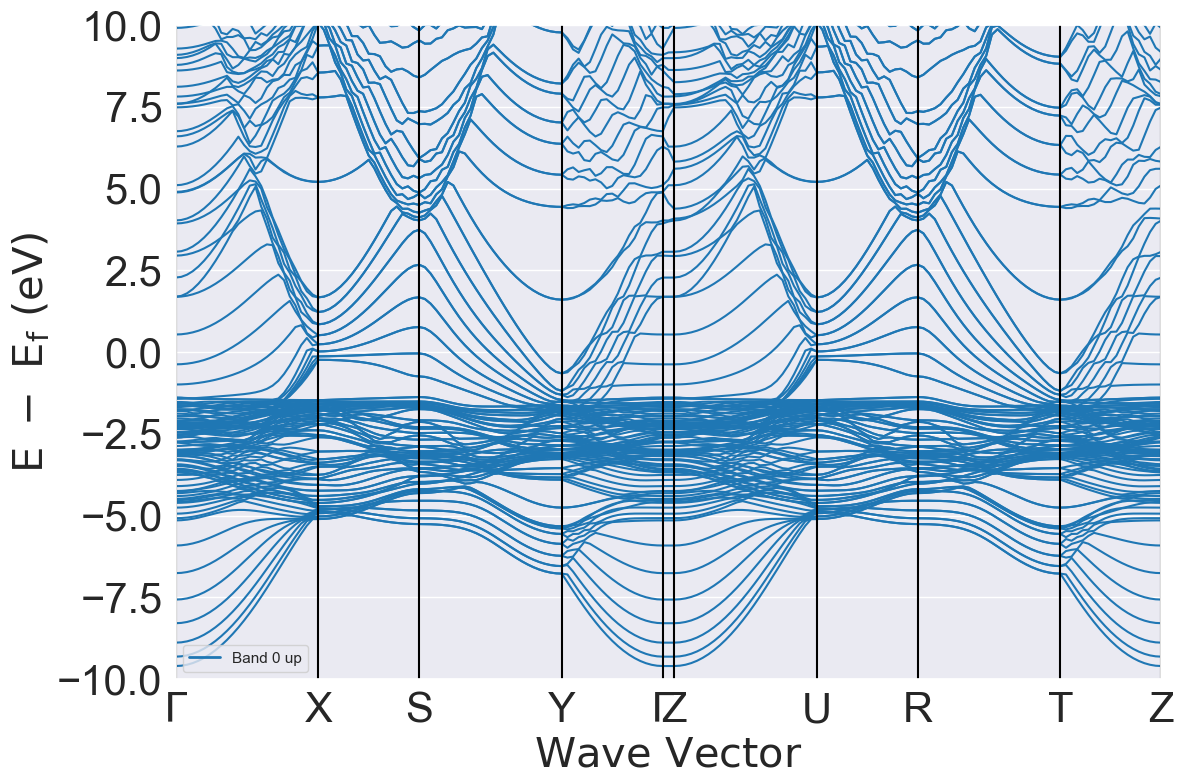

In [40]:
plotter = BSPlotter(cu110_bs)
plotter.get_plot()
# plt.savefig('./structures/Cu_photocathodes/new_optados_02_24/Cu110/bandstructure/O2B_ORC_redo_BS_-10_10.png',dpi=250)

In [16]:
directory = './OD_debug_files/1Step_Testing/Cu100_64x64/1step_kpt_QE_dat/'
filelist = os.listdir(directory)
kpt_data = {}
for file in filelist:
    if not Path(directory+file).is_dir():
        if 'mp_1step' in file:
            energy = float(file.split('_')[3])
            kpt_data[energy] = np.genfromtxt(directory+file)
kpts = np.abs(np.genfromtxt('./OD_debug_files/1Step_Testing/Cu100_64x64/1step_kpt_QE_dat/kpts_cartesian.dat',delimiter=';'))

In [17]:
energies = np.linspace(4.3,6.0,171)

In [18]:
maximum = 0
minimum = np.inf
for element in kpt_data.values():
    # print(element)
    if np.nanmax(element) > maximum:
        maximum = np.nanmax(element)
    if np.nanmax(element) > 0:
        if np.nanmin(element[np.nonzero(element)]) < minimum:
            minimum = np.nanmin(element[np.nonzero(element)])

In [19]:
def extract_mte(files:list, labels:list):
    if len(labels) != len(files):
        raise IndexError('The number of given files and labels does not match!')
    totals = {}
    for idx,file in enumerate(files):
        local_total = []        
        for energy in file.qe_data.keys():
            local_total.append([float(energy),file.qe_data[energy]['mte']])
        totals[labels[idx]] = np.array(local_total)
    return totals;

In [20]:
od_data_2 = OptaDOSOutput(Path('./OD_debug_files/1Step_Testing/Cu100_64x64/Cu100_mp_4.3_6.0.odo'))
mtes = extract_mte([od_data_2],['Cu100'])

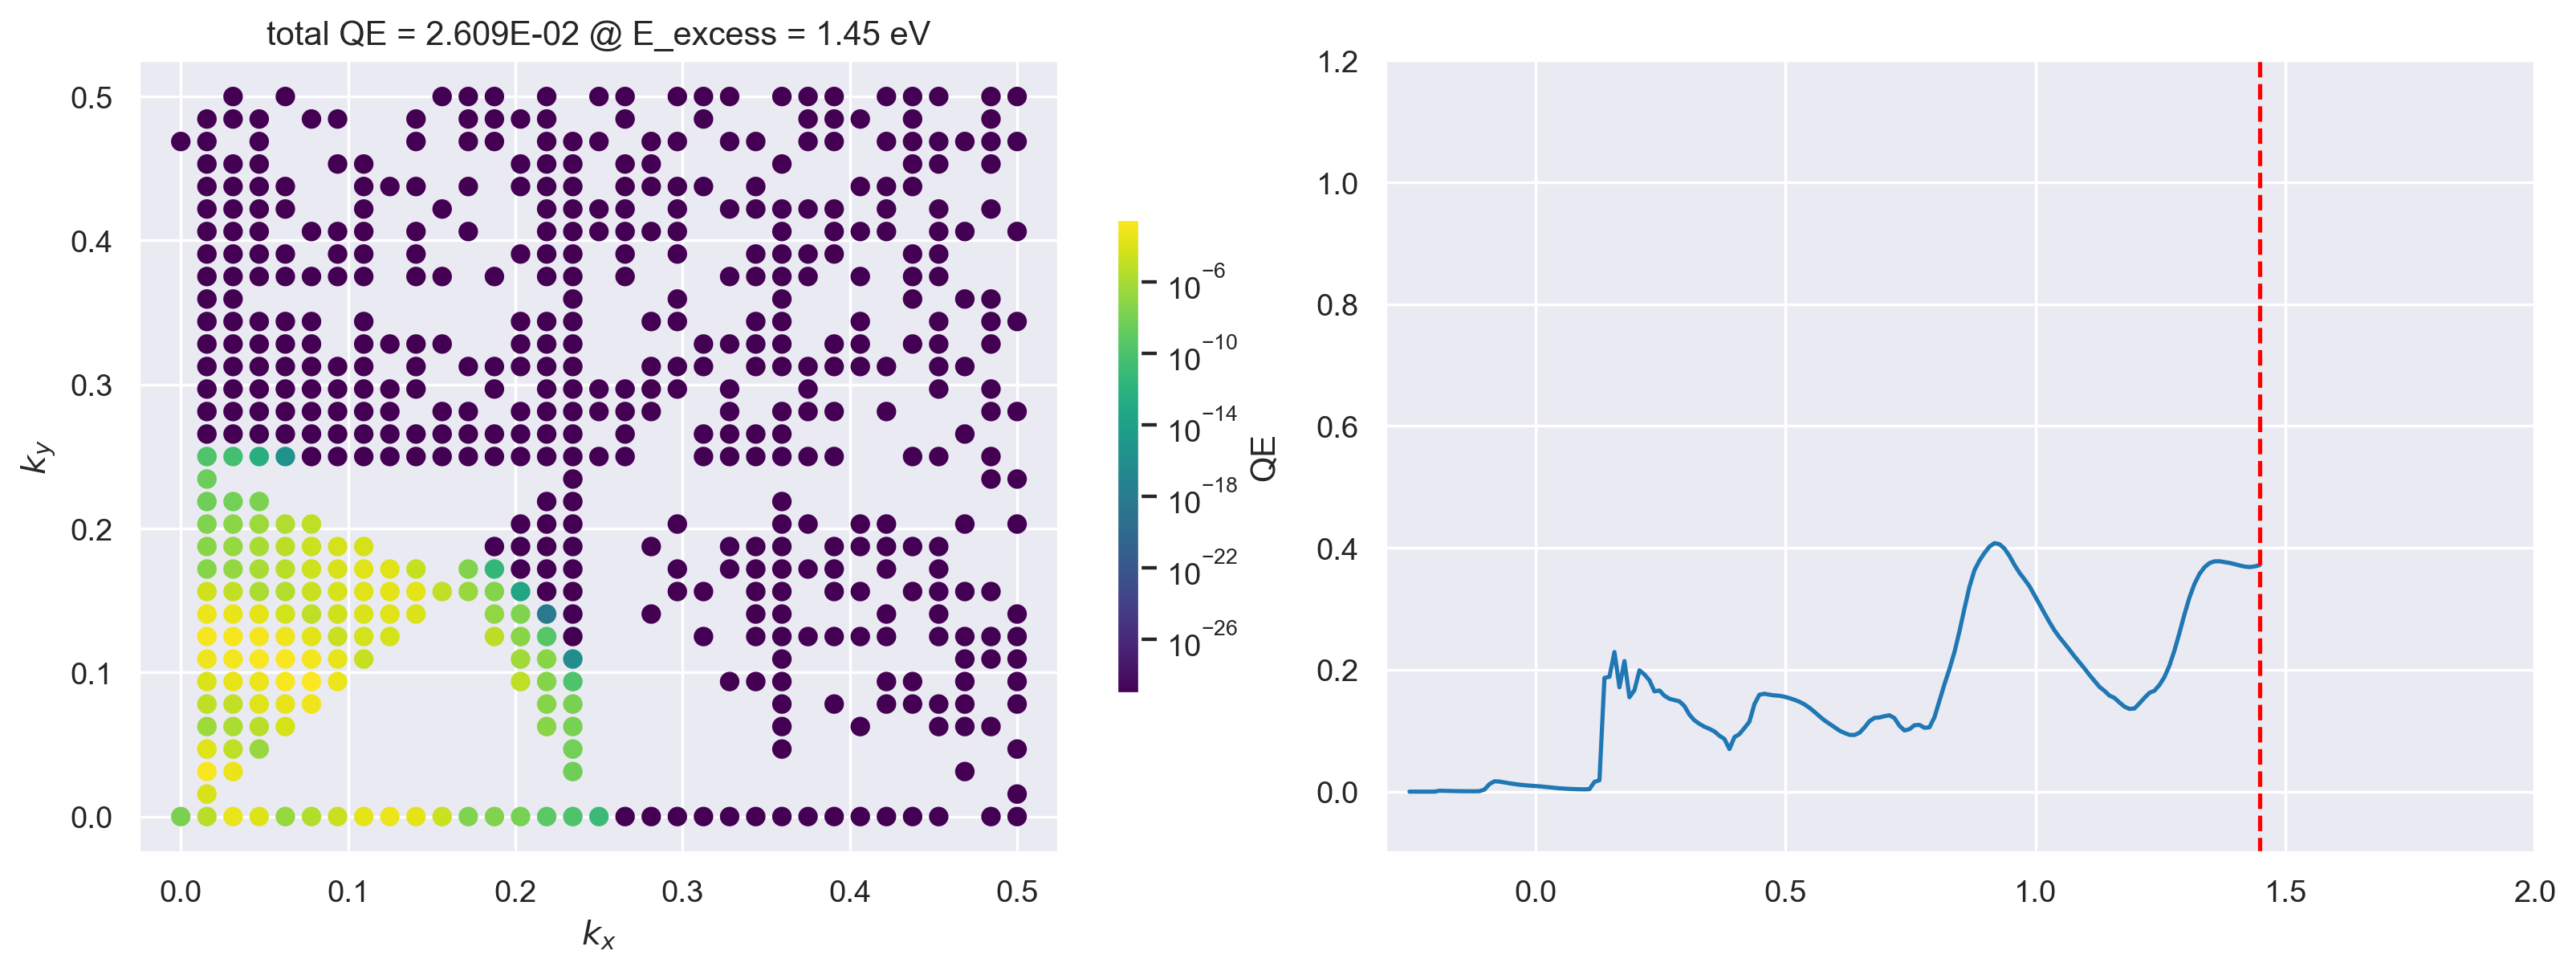

In [21]:
import matplotlib.colors as mlp
cmap = 'viridis'
k_data = kpt_data[4.47]
sns.set_style('darkgrid')
sns.set_context('notebook')
fig,ax = plt.subplots(1,2, figsize = [13,5],dpi = 250)
scatter = ax[0].scatter(kpts[:,0],kpts[:,1],cmap=cmap,norm=mlp.LogNorm(vmin=minimum, vmax=maximum,clip = True),c=k_data)
ax[0].set_xlabel('$k_x$')
ax[0].set_ylabel('$k_y$')
ax[1].plot(mtes['Cu100'][:,0]-4.5519,mtes['Cu100'][:,1])
mte_line = ax[1].plot(4.47,-.1,4.47,1.4,c='r',linestyle='--')
ax[1].set_ylim([-.1,1.2])
ax[1].set_xlim([-.3,2])
fig.colorbar(mpl.cm.ScalarMappable(norm=mlp.LogNorm(vmin=minimum, vmax=maximum,clip = True),cmap= cmap),ax = ax[0],orientation='vertical',label = 'QE',shrink=0.6,pad=0.05)
for energy in energies:
    ax[0].set_title(f'total QE = {np.sum(kpt_data[round(energy,3)]):.3E} @ E_excess = {energy - 4.5519:.2f} eV')
    scatter.set_array(kpt_data[round(energy,3)])
    mte_line[0].set(xdata = [energy-4.5519,energy-4.5519],ydata =[-.1,1.4])
    plt.tight_layout()
    plt.savefig(f'./OD_debug_files/1Step_Testing/Cu100_64x64/1step_kpt_QE_dat/plots/QE_MTE_k_plots_{energy:.2f}.png',dpi=150)

In [22]:
# importing libraries
import os
import cv2  
  
# Video Generating function
def generate_video(image_folder:str,framerate:float,final_name:str):      
    images = [img for img in os.listdir(image_folder)
            #   if '3step' in img]
              if img.endswith(".png")]
  
    frame = cv2.imread(os.path.join(image_folder, images[0]))
  
    # setting the frame width, height width
    # the width, height of first image
    height, width, layers = frame.shape  
  
    video = cv2.VideoWriter('temp.avi', 0, framerate, (width, height)) 
  
    # Appending the images to the video one by one
    for image in images: 
        video.write(cv2.imread(os.path.join(image_folder, image))) 
    # Deallocating memories taken for window creation
    cv2.destroyAllWindows() 
    video.release()  # releasing the video generated
    os.system(f"ffmpeg -i temp.avi -vcodec libx264 {final_name}.mp4")
    os.system('rm -f temp.avi')

generate_video('./OD_debug_files/1Step_Testing/Cu100_64x64/1step_kpt_QE_dat/plots',5,'QE_MTE_kpt_1step')

In [37]:
data_a = OptaDOSOutput(Path('./structures/Cu_photocathodes/new_optados_02_24/Cu100/ds_like_model_comparisons/Cu100_mp_128_fixed_0.026_unnormed_delta_final_Eexc.odo'))
data_b = OptaDOSOutput(Path('./structures/Cu_photocathodes/new_optados_02_24/Cu100/ds_like_model_comparisons/Cu100_mp_128_fixed_0.05_unnormed_delta_final_Eexc.odo'))
data_c = OptaDOSOutput(Path('./structures/Cu_photocathodes/new_optados_02_24/Cu100/ds_like_model_comparisons/Cu100_mp_128_fixed_0.1_unnormed_delta_final_Eexc.odo'))
data_d = OptaDOSOutput(Path('./structures/Cu_photocathodes/new_optados_02_24/Cu100/Cu100_mp_128x128_ds_like_fixed_0.05_jdos_0.001.odo'))
mtes = extract_mte([data_a,data_b,data_c,data_d],['026','05','1','05_0.001'])

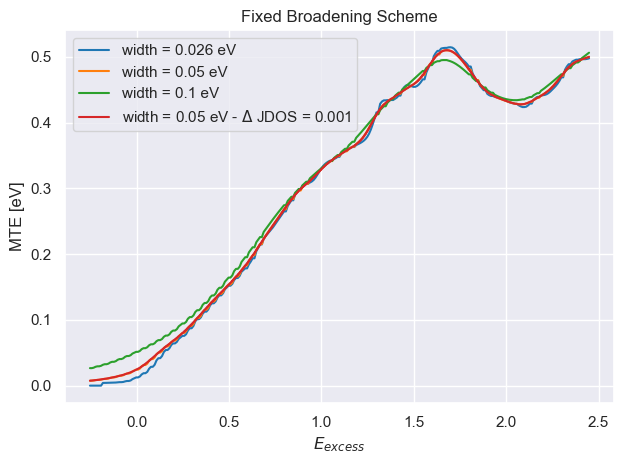

In [38]:
sns.set_style('darkgrid')
sns.set_context('notebook')
plt.plot(mtes['026'][:,0]-4.5519,mtes['026'][:,1],label = 'width = 0.026 eV')
plt.plot(mtes['05'][:,0]-4.5519,mtes['05'][:,1],label = 'width = 0.05 eV')
plt.plot(mtes['1'][:,0]-4.5519,mtes['1'][:,1],label = 'width = 0.1 eV')
plt.plot(mtes['05_0.001'][:,0]-4.5519,mtes['05_0.001'][:,1],label = 'width = 0.05 eV - $\Delta$ JDOS = 0.001')
# plt.plot(mtes['64norm'][:,0]-4.5519,mtes['64norm'][:,1],label = '64x64 MP with normed $\Delta$ function')
plt.legend()
plt.title('Fixed Broadening Scheme')
plt.ylabel('MTE [eV]')
plt.xlabel('$E_{excess}$')
plt.tight_layout()
plt.savefig(f'./structures/Cu_photocathodes/new_optados_02_24/Cu100/DS_like_MTE_fixed_final_comp_fine.png',dpi=250)

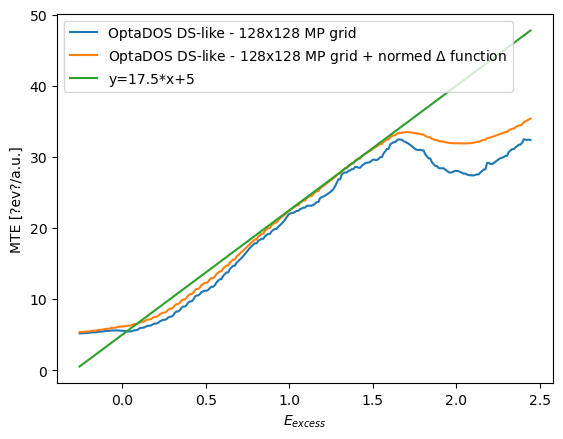

In [14]:
def onethird(x,a,b):
    return a*x+b
a = 17.5
b = 5
num = 128
plt.plot(mtes['128'][:,0]-4.556,mtes['128'][:,1],label='OptaDOS DS-like - 128x128 MP grid')
plt.plot(mtes['128d'][:,0]-4.556,mtes['128d'][:,1],label='OptaDOS DS-like - 128x128 MP grid + normed $\Delta$ function')
plt.plot(mtes['128'][:,0]-4.556,onethird(mtes['128'][:,0]-4.556,a,b),label = f'y={a}*x+{b}')
# plt.ylim(1400,8600)

plt.legend()
plt.ylabel('MTE [a.u.]')
plt.xlabel('$E_{excess}$')
plt.savefig(f'./structures/Cu_photocathodes/new_optados_02_24/Cu100/DS_like_MTE_plot_128_comp.png',dpi=250)

In [9]:


print(MTE_2_intrinsic_emittance(np.array([30,60,80])))


[0.24229019 0.34265007 0.39565822]
